In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

In [51]:
df = pd.read_csv("datasets/all_features.csv")

In [3]:
df = df.drop(columns = ["SOFR","SOFRVOL","EFFRVOL","OBFR","OBFRVOL"])

In [52]:
df = df.set_index("date")

In [53]:
df = df.dropna()

In [54]:
df = (df-df.mean())/df.std()

## Correlation

In [68]:
cor = df.corr()["SP500_NORM"].sort_values(ascending = False)

In [69]:
cor.to_csv("datasets/correlation.csv")

<AxesSubplot:ylabel='SP500_NORM'>

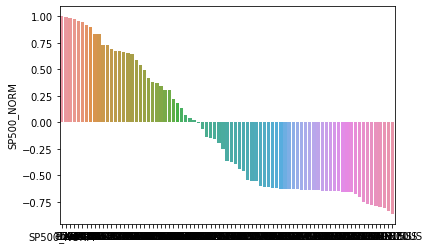

In [70]:
sns.barplot(x = cor.index, y = cor)

## Change Rate Correlation

In [61]:
df = df.drop(columns = "SP500_UNNORM")

In [62]:
diffs = df.diff().replace(0, method = "bfill")
dcor = diffs.corr()["SP500_NORM"].sort_values(ascending = False)

In [64]:
dcor.to_csv("datasets/diff_correlation.csv")

<AxesSubplot:ylabel='SP500_NORM'>

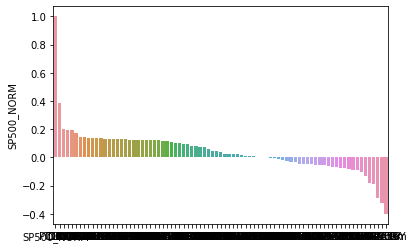

In [63]:
sns.barplot(x = dcor.index, y = dcor)

In [65]:
dcor.head()

SP500_NORM    1.000000
T10YIE        0.383856
DFII30        0.199945
DLTIIT        0.198009
DEXUSUK       0.196228
Name: SP500_NORM, dtype: float64

In [75]:
dcor.tail()

NameError: name 'dcor' is not defined

In [71]:
cor.head()

SP500_NORM    1.000000
ema           0.992087
ma7           0.981564
12ema         0.976740
26ema         0.955363
Name: SP500_NORM, dtype: float64

In [76]:
cor.tail()

MORTGAGE15US   -0.792829
MORTGAGE30US   -0.797836
DFII10         -0.805807
DFII7          -0.837806
DFII5          -0.864771
Name: SP500_NORM, dtype: float64

## Time Lagged Cross Correlation

In [13]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [86]:
lags = [1,5,20,250]
tlcc = pd.DataFrame(index = lags, columns = df.columns)
for l in lags:
    for c in df.columns:
        tlcc[c][l] = crosscorr(df[c].copy(),df["SP500_NORM"].copy(),l)
tlcc = tlcc.astype("float")

In [87]:
tlcc.to_csv("datasets/diff_tlcc.csv")

<AxesSubplot:>

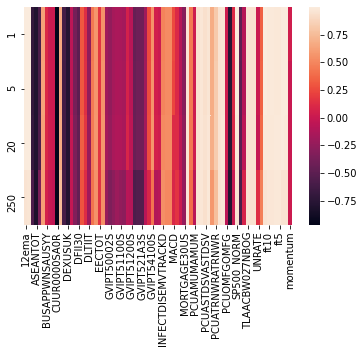

In [43]:
sns.heatmap(tlcc)

## Change Rate Time Lagged Cross Correlation

In [79]:
lags = [1,5,20,250]
dtlcc = pd.DataFrame(index = lags, columns = diffs.columns)
for l in lags:
    for c in diffs.columns:
        dtlcc[c][l] = crosscorr(diffs[c].copy(),diffs["SP500_NORM"].copy(),l)
dtlcc = dtlcc.astype("float")

In [85]:
dtlcc.to_csv("datasets/diff_tlcc.csv")

<AxesSubplot:>

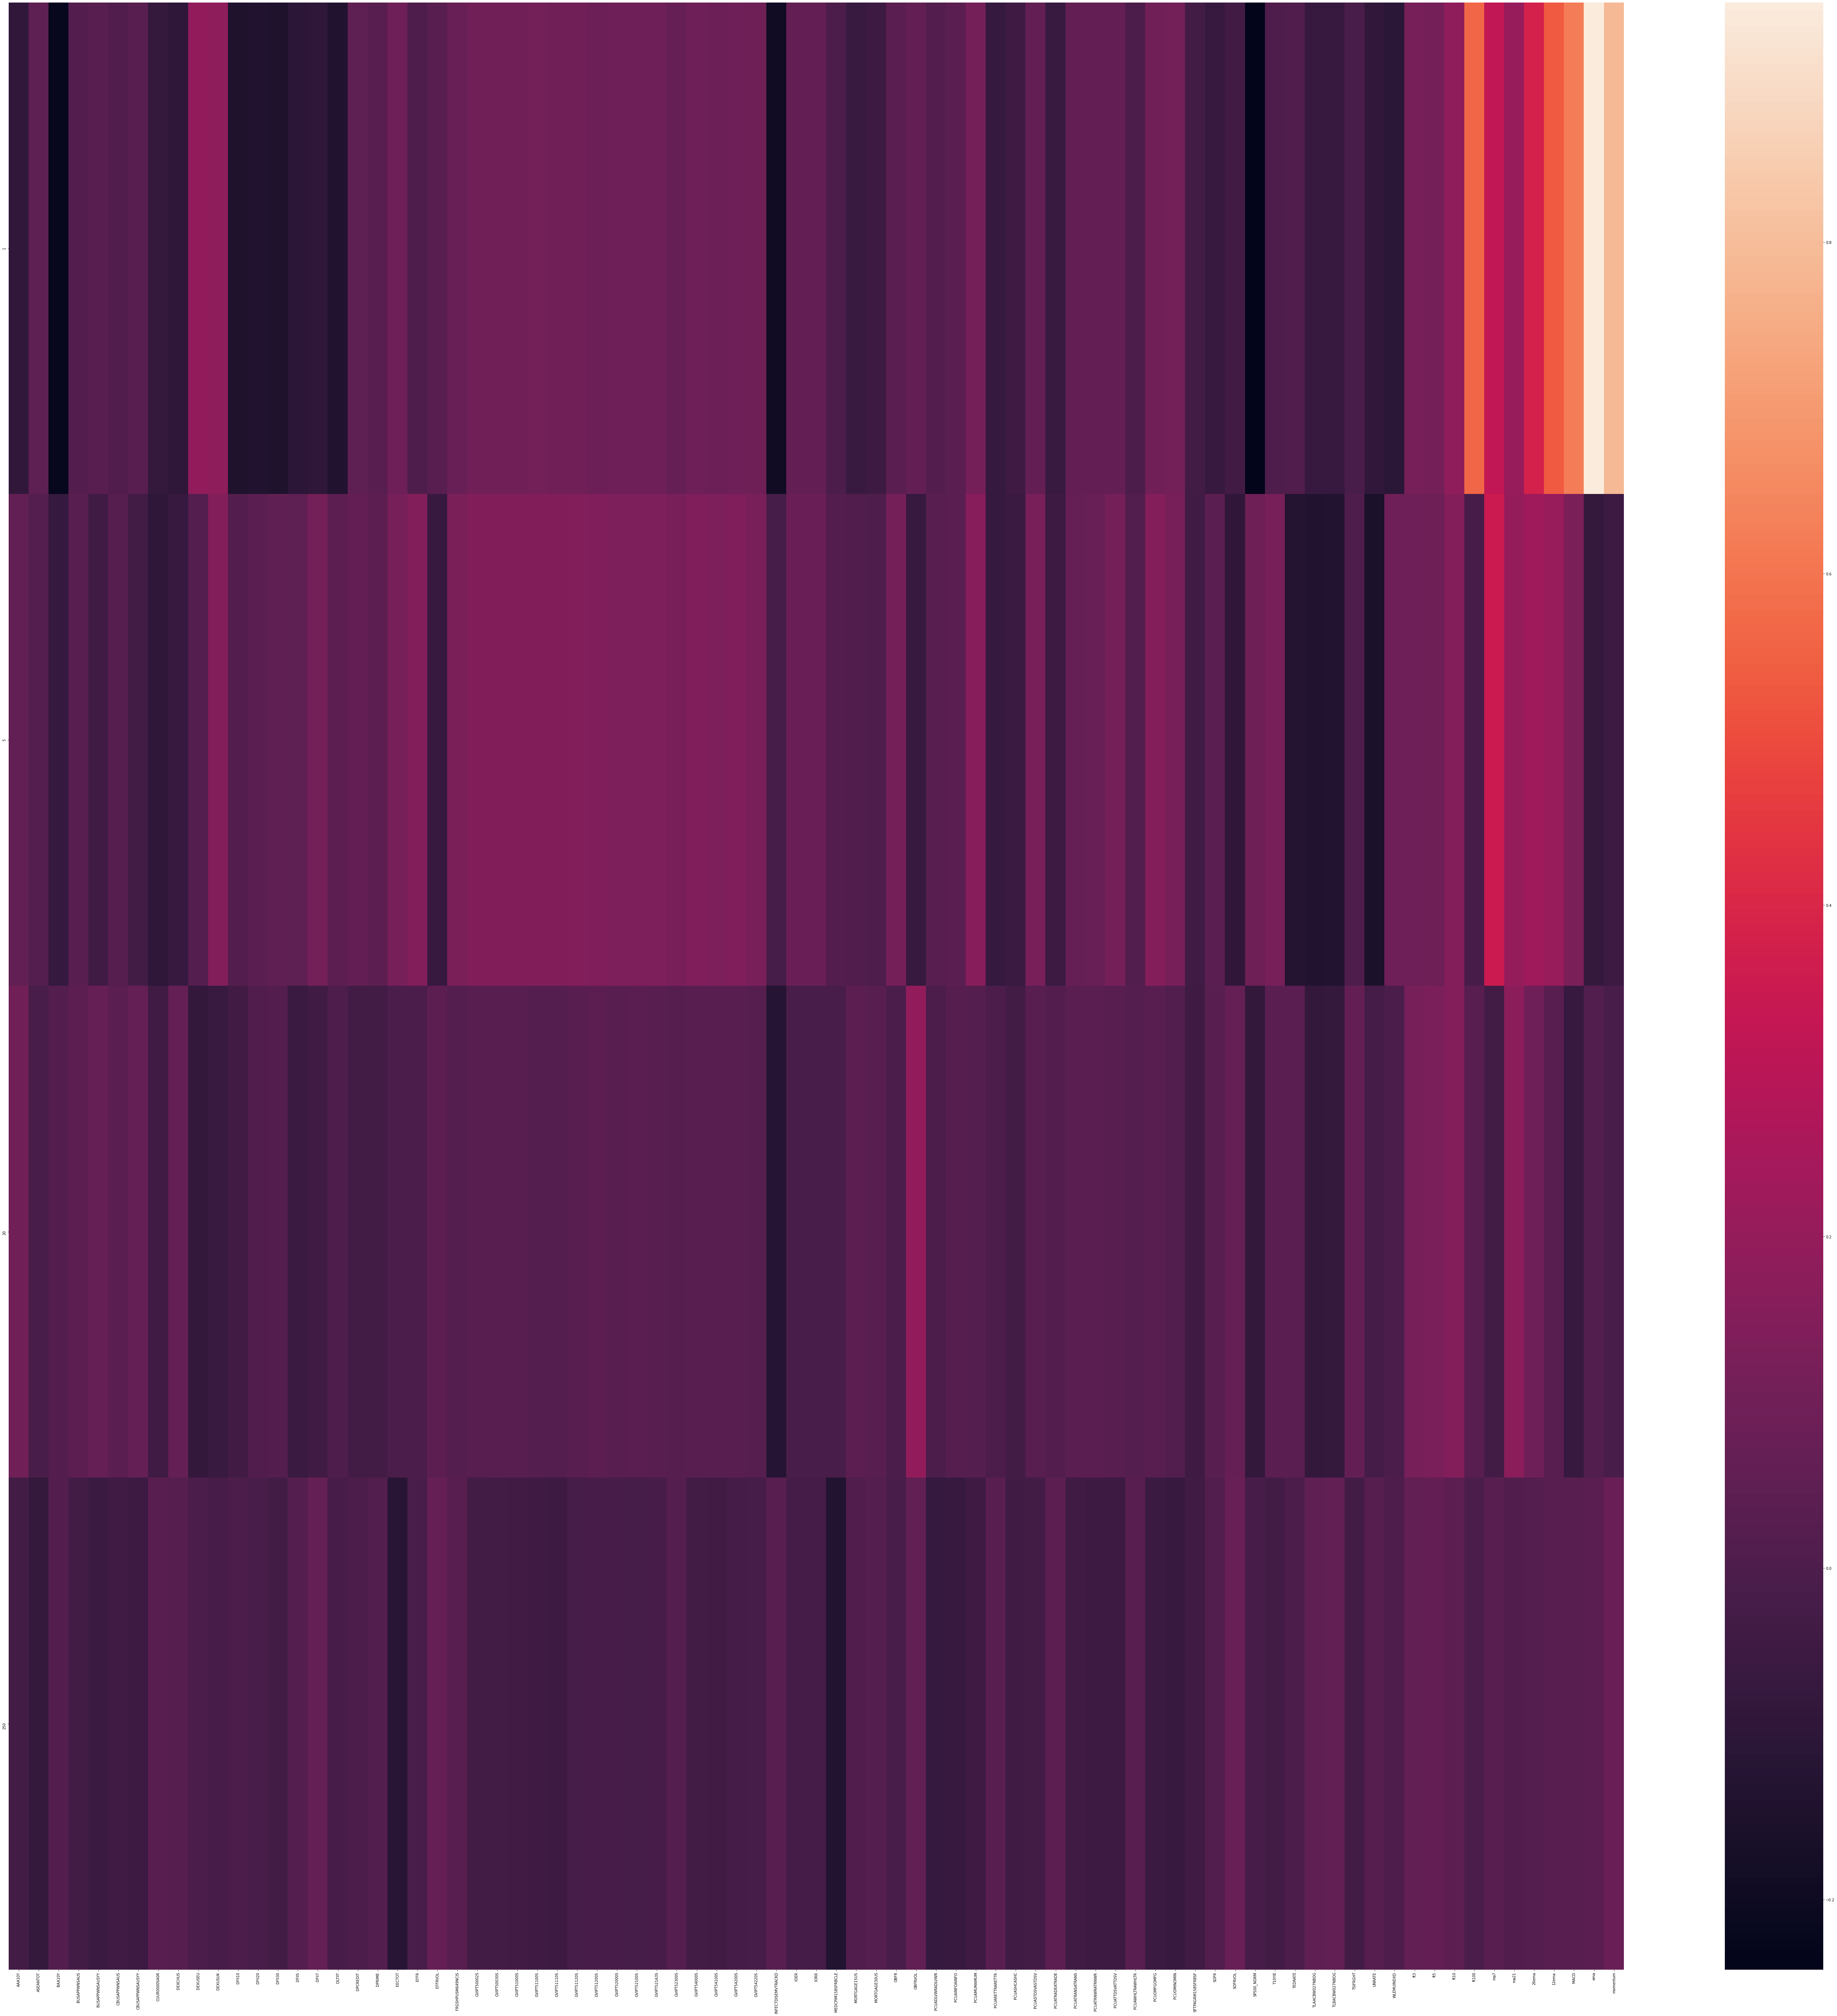

In [82]:
sns.heatmap(dtlcc,ax)

In [83]:
diffs.columns[-10:]

Index(['ft5', 'ft10', 'ft100', 'ma7', 'ma21', '26ema', '12ema', 'MACD', 'ema',
       'momentum'],
      dtype='object')

## 